<a href="https://colab.research.google.com/github/devtfalcao/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Arquivo Utilizado**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample (3).csv


# **Leitura do Arquivo com Pandas**

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
print(df.shape)

(2823, 25)


Utilizei o df.head() para exibir as 5 primeiras linhas do dataframe e com o df.shape pude observar que esse dataframe possui 2823 linhas e 25 colunas.

In [6]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


O df.columns lista os nomes de todas as colunas na ordem em que aparecem no dataframe.

In [7]:
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


Aqui usamos o dtypes para definir o tipo de dados de cada coluna.

# **Tipos de Dados Encontrados**


*   int64 - número inteiro
*   float64 - número decimal
*   object - geralmente texto




# **Extraindo e exibindo informações do item**

In [8]:
nomes = list(df['COUNTRY'])
for nome in nomes[:5]:
    print(nome)

USA
France
France
USA
USA


In [9]:
dict_produtos = dict(zip(df['PRODUCTCODE'][:50], df['PRODUCTLINE'][:50]))
print(dict_produtos)

{'S10_1678': 'Motorcycles', 'S10_1949': 'Classic Cars'}


In [10]:
linha0 = df.iloc[0]
minha_tupla = (linha0['CUSTOMERNAME'], linha0['COUNTRY'], linha0['SALES'])
print(minha_tupla)

('Land of Toys Inc.', 'USA', np.float64(2871.0))


Listando os 5 primeiros valores da coluna de países, observei que um único país aparece mais da metade das vezes, podendo sugerir uma predominância em vendas. O dicionário mostrou que dos primeiros 50 valores os produtos que aparecem são "Motorcycles" e "Classic Cars". Pela tupla da primeira linha, observei uma venda constando o nome do cliente, o país e o valor.

# **Utilização de Estruturas Condicionais e Laços**

In [11]:
# Escolha uma coluna numérica adequada
coluna_numerica = 'SALES'



# Estrutura condicional personalizada:

#Descobrindo o país com o maior total de vendas usando if
if coluna_numerica in df.columns:
    pais_com_maior_venda = df.groupby('COUNTRY')[coluna_numerica].sum().idxmax()
    total_venda_pais_com_maior_venda = df[df['COUNTRY'] == pais_com_maior_venda][coluna_numerica].sum()
    print(f"O país com o maior total de vendas é: {pais_com_maior_venda}")
    print(f"O total de vendas desse país é de: {total_venda_pais_com_maior_venda:,.2f}")



# Uso do For para somar as cinco maiores vendas de todos os tempos
vendas_ordenadas = sorted(df['SALES'], reverse=True)
top_5_vendas = vendas_ordenadas[:5]
print("\nAs 5 maiores vendas de todos os tempos:")
for venda in top_5_vendas:
    print(f"{venda:,.2f}")




#Encontrar a maior venda feita para os USA
while True:
  maior_venda = df[df['COUNTRY'] == 'USA']['SALES'].max()
  print(f"\nA maior venda feita para os USA foi de: {maior_venda:,.2f}")
  break

O país com o maior total de vendas é: USA
O total de vendas desse país é de: 3,627,982.83

As 5 maiores vendas de todos os tempos:
14,082.80
12,536.50
12,001.00
11,887.80
11,886.60

A maior venda feita para os USA foi de: 14,082.80


# **Operadores Aritméticos e Manipulação de Dados**

In [12]:
# Oferece desconto de 10% para vendas acima de 3000.
df.loc[df['SALES'] > 3000, 'DESCONTO'] = (df['SALES'] * 0.10).round(2)
df.loc[df['SALES'] <= 3000, 'DESCONTO'] = 0
print(df[['SALES', 'DESCONTO']].head())
display(df.head(10))

     SALES  DESCONTO
0  2871.00      0.00
1  2765.90      0.00
2  3884.34    388.43
3  3746.70    374.67
4  5205.27    520.53


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DESCONTO
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0.00
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,0.00
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,388.43
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,374.67
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,520.53
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium,347.98
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small,0.00
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium,551.23
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small,0.00
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium,470.84


Criei uma coluna nova chamada "DESCONTO" que oferece um desconto de 10% mas somente para compras acima de 3000.

Exibi na tela os primeiros 10 valores do dataframe para uma melhor visualização do desconto na prática.

# **NumPy e Arrays Numéricos**

In [13]:
array_vendas = np.array(df['SALES'])

# Maior valor de venda
maior_venda = array_vendas.max()

# Menor valor de venda
menor_venda = array_vendas.min()

# Soma total de vendas
total_vendas = array_vendas.sum()

# Média das vendas
media_vendas = array_vendas.mean()


# Exibe os resultados formatados em reais, com separador de milhares e duas casas decimais.
print(f'Total de vendas: {total_vendas:,.2f}')
print(f'Média de vendas: {media_vendas:,.2f}')
print(f'Maior valor de venda: {maior_venda:,.2f}')
print(f'Menor valor de venda: {menor_venda:,.2f}')

Total de vendas: 10,032,628.85
Média de vendas: 3,553.89
Maior valor de venda: 14,082.80
Menor valor de venda: 482.13


#**Acesso e Manipulação de Dados com Pandas**


In [14]:
df.loc[0:5, ['SALES', 'PRODUCTLINE', 'CUSTOMERNAME']]

,SALES,PRODUCTLINE,CUSTOMERNAME
0,2871.00,Motorcycles,Land of Toys Inc.
1,2765.90,Motorcycles,Reims Collectables
2,3884.34,Motorcycles,Lyon Souveniers
3,3746.70,Motorcycles,Toys4GrownUps.com
4,5205.27,Motorcycles,Corporate Gift Ideas Co.
5,3479.76,Motorcycles,Technics Stores Inc.


In [15]:
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Exibindo o resultado usando markdown e floatfmt
print(vendas_por_categoria.to_markdown(floatfmt=",.2f"))



| PRODUCTLINE      |        SALES |
|:-----------------|-------------:|
| Classic Cars     | 3,919,615.66 |
| Vintage Cars     | 1,903,150.84 |
| Motorcycles      | 1,166,388.34 |
| Trucks and Buses | 1,127,789.84 |
| Planes           |   975,003.57 |
| Ships            |   714,437.13 |
| Trains           |   226,243.47 |


Podemos observar a dominância de vendas da categoria de "Classic Cars" com quase 4 milhões, estando muito a frente das demais colocadas.

# **Visualização de Dados**

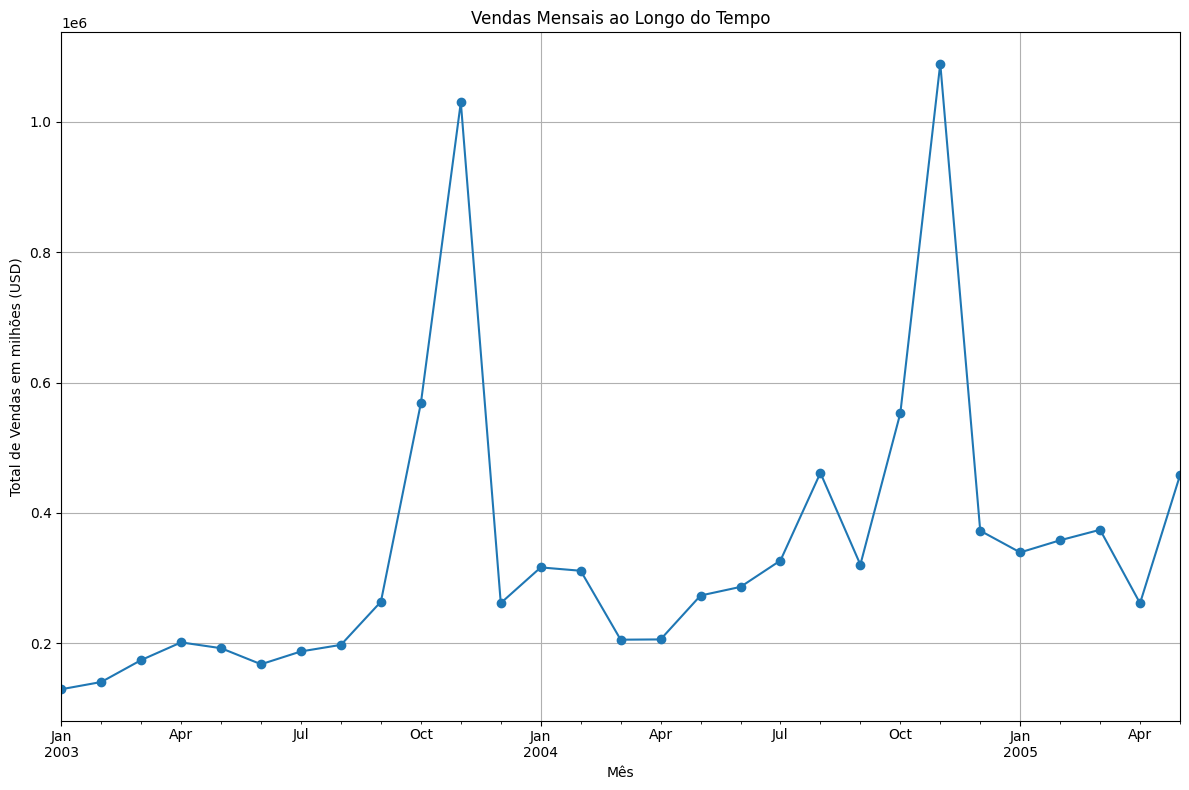

In [16]:
# Redefinindo "ORDERDATE" para coluna
df = df.reset_index()

# Convertendo a coluna de data para o formato de data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Definindo a data como o índice do nosso DataFrame
df.set_index('ORDERDATE', inplace=True)

# Agrupando os dados por mês e somando as vendas de cada mês
monthly_sales = df['SALES'].resample('ME').sum()


# Criando o gráfico de linha
plt.figure(figsize=(12, 8))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas em milhões (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Gráfico de Linhas**: Vendas ao Longo do Tempo

Através desse gráfico, podemos observar a evolução das vendas totais em cada mês durante o período analisado.

Nos dois anos analisados (2003 e 2004), conseguimos identificar picos de vendas entre os últimos meses, provavelmente devido às compras de fim de ano e promoções.

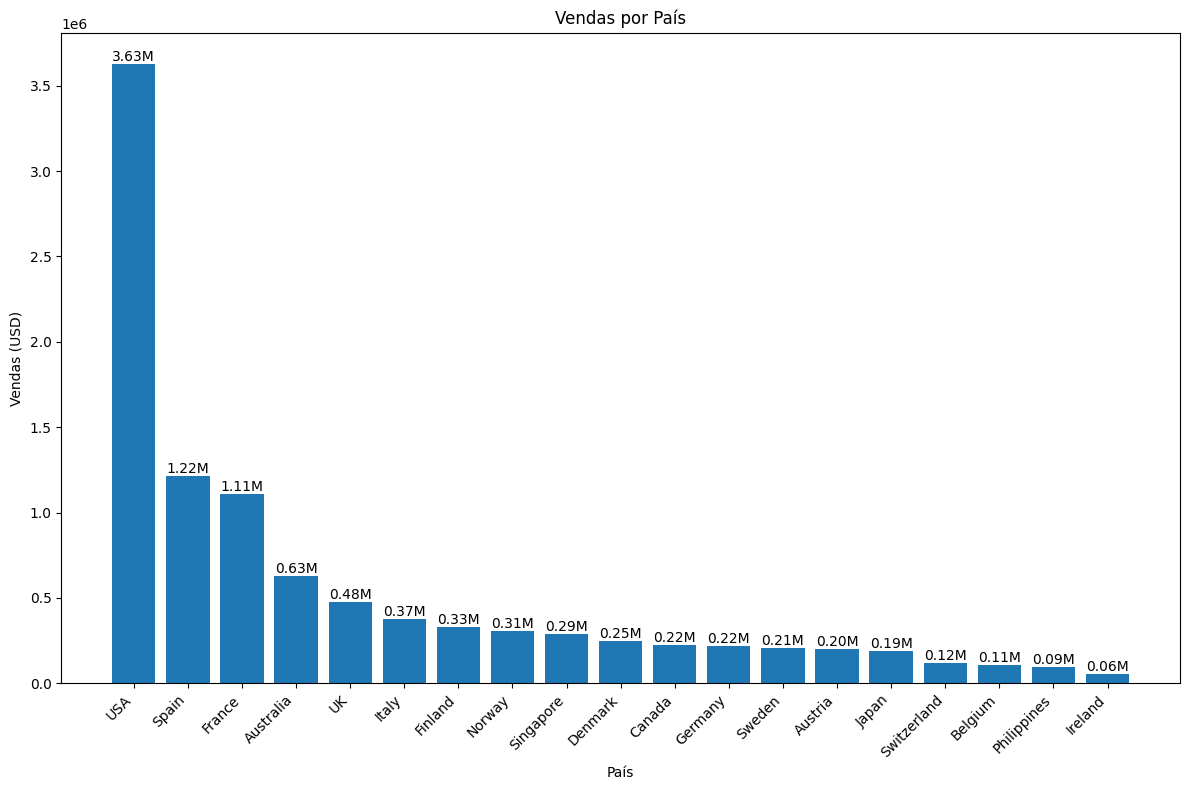

In [17]:
# Agrupando por país e somando as vendas
vendas_pais = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(vendas_pais.index, vendas_pais.values)
plt.title('Vendas por País')
plt.xlabel('País')
plt.ylabel('Vendas (USD)')
plt.xticks(rotation=45, ha='right')

# Adicionando os números de vendas em cima das barras
for bar in bars:
    valor_y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, valor_y, f'{valor_y/1000000:.2f}M', va='bottom', ha='center')

plt.tight_layout()
plt.show()

**Gráfico de Barras**: Vendas por País

O gráfico mostrou a extrema dependência do negócio no mercado dos EUA, de onde vem a maior receita das vendas.

Uma boa estratégia de crescimento seria começar a focar na expansão do mercado europeu (Espanha e França) para diversificar a receita e reduzir o risco dessa dependência.

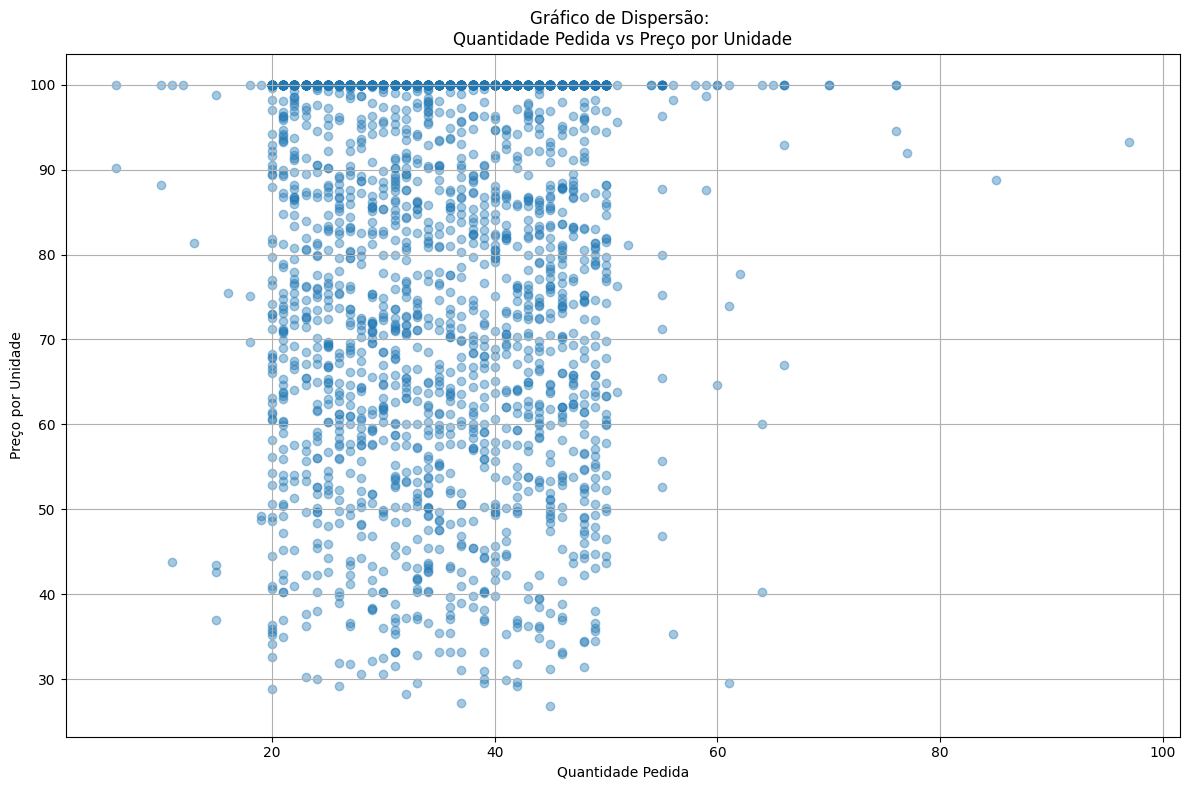

In [18]:
# Verificando se as colunas 'QUANTITYORDERED' e 'PRICEEACH' estão presentes no DataFrame.
if 'QUANTITYORDERED' in df.columns and 'PRICEEACH' in df.columns:

    # Criando um gráfico de dispersão para verificar a relação entre quantidade pedida e o preço por unidade.
    plt.figure(figsize=(12, 8))
    plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'], alpha=0.4)
    plt.title('Gráfico de Dispersão: \nQuantidade Pedida vs Preço por Unidade')
    plt.xlabel('Quantidade Pedida')
    plt.ylabel('Preço por Unidade')

    # Adicionando grades para uma visualização melhor
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Gráfico de Dispersão**: Relação Preço-Quantidade

O gráfico de dispersão mostra que a maioria dos pedidos tem entre 20 e 60 unidades. Produtos com preços mais baixos são encomendados com mais frequência e em maior quantidade. Produtos mais caros são comprados em quantidades muito pequenas, revelando uma relação inversa entre preço e quantidade.




# **Relatório Final**


Neste projeto, analisei a base de vendas (sales_data_sample.csv) de uma loja que vende miniaturas colecionáveis e que conta com 2823 linhas e 25 colunas.


### **O Que Eu Descobri com os Gráficos**

O meu trabalho foi analisar um ficheiro de vendas de uma loja e criar 3 gráficos diferentes para entender o que estava acontecendo.

**1. Descoberta com o Gráfico de Linha (Vendas ao Longo do Tempo)**

* **O que eu fiz:** Criei um gráfico de linha para ver como as vendas subiam e desciam ao longo dos meses.
* **O que o gráfico me mostrou:** A linha do gráfico disparava no final do ano, principalmente em outubro e novembro, e em janeiro caía.
* **O que eu aprendi:** Que a loja tem uma época muito forte de vendas, provavelmente por conta de promoções como Black Friday e datas como o Natal.

**2. Gráfico de Barras (Vendas por País)**

* **O que eu fiz:** Criei um gráfico de barras para comparar o total de vendas em cada país.
* **O que o gráfico me mostrou:** A barra dos **EUA** era muito maior que as outras. Seguida das barras da Espanha e da França, que eram bem menores.
* **O que eu aprendi:** Que a loja vende mais nos EUA do que em qualquer outro país.

**3. Descoberta com o Gráfico de Dispersão (Preço vs. Quantidade)**

* **O que eu fiz:** Fiz um gráfico de dispersão com bolinhas para ver se o preço de um item influenciava a quantidade de compras.
* **O que o gráfico me mostrou:** As bolinhas mostraram que quando um produto era muito caro, as pessoas compravam em menor quantidade. A maioria das vendas eram de produtos mais baratos.
* **O que eu aprendi:** Que o forte da loja não é vender produtos super caros, mas sim os de preço médio.



**Resumo:** Com tudo o que fui analisando, descobri que a loja depende demais dos EUA e deveria focar no mercado europeu para diminuir essa dependência, vende mais produtos de valor médio e tem seu pico de vendas no último trimestre do ano.
